<a href="https://colab.research.google.com/github/Balaji5359/Kaggle-DS-Projects/blob/main/Student_Placement_Chance_Classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset simulates the academic and professional profiles of 10,000 college students, focusing on factors that influence placement outcomes. It includes features like IQ, academic performance, CGPA, internships, communication skills, and more.
## Dataset Columns
* Column Name	Description
* College_ID	Unique ID of the college (e.g., CLG0001 to CLG0100)
* IQ	Student’s IQ score (normally distributed around 100)
* Prev_Sem_Result	GPA from the previous semester (range: 5.0 to 10.0)
* CGPA	Cumulative Grade Point Average (range: ~5.0 to 10.0)
* Academic_Performance	Annual academic rating (scale: 1 to 10)
* Internship_Experience	Whether the student has completed any internship (Yes/No)
* Extra_Curricular_Score	Involvement in extracurriculars (score from 0 to 10)
* Communication_Skills	Soft skill rating (scale: 1 to 10)
* Projects_Completed	Number of academic/technical projects completed (0 to 5)
* Placement	Final placement result (Yes = Placed, No = Not Placed)

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
data = pd.read_csv('/content/college_student_placement_dataset.csv')
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [83]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [85]:
data.isna().sum()

,0
College_ID,0
IQ,0
Prev_Sem_Result,0
CGPA,0
Academic_Performance,0
Internship_Experience,0
Extra_Curricular_Score,0
Communication_Skills,0
Projects_Completed,0
Placement,0


In [86]:
#Splitting data into train and test
X = data.drop(columns=['Placement','College_ID',], axis=1)
y = data['Placement']
X.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,No,8,8,4
1,97,5.52,5.37,8,No,7,8,0
2,109,5.36,5.83,9,No,3,1,1
3,122,5.47,5.75,6,Yes,1,6,1
4,96,7.91,7.69,7,No,8,10,2


In [87]:
d = {'Yes':1, 'No':0}
y = y.map(d)
X['Internship_Experience'] = X['Internship_Experience'].map(d)
X.head()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,107,6.61,6.28,8,0,8,8,4
1,97,5.52,5.37,8,0,7,8,0
2,109,5.36,5.83,9,0,3,1,1
3,122,5.47,5.75,6,1,1,6,1
4,96,7.91,7.69,7,0,8,10,2


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (8000, 8)
Shape of y_train =  (8000,)
Shape of X_test =  (2000, 8)
Shape of y_test =  (2000,)


In [89]:
#Build classifier using Logistic Regession
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [90]:
#Check performance of Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1595   79]
 [ 139  187]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1674
           1       0.70      0.57      0.63       326

    accuracy                           0.89      2000
   macro avg       0.81      0.76      0.78      2000
weighted avg       0.88      0.89      0.89      2000



In [91]:
#Display Precision,Recall,F1-score of Logistic Regression Classifier
from sklearn.metrics import precision_score, recall_score, f1_score
log_reg_precision1 = precision_score(y_test,y_pred)
log_reg_recall1 = recall_score(y_test,y_pred)
log_reg_f1_score1 = f1_score(y_test,y_pred)
print("Precision score of Logistic Classifier of 1:", round(log_reg_precision1, 2))
print("Recall score of Logistic Classifier of 1:", round(log_reg_recall1, 2))
print("F1-score of Logistic Classifier of 1:", round(log_reg_f1_score1, 2))
log_reg_precision0 = precision_score(y_test,y_pred,pos_label=0)
log_reg_recall0 = recall_score(y_test,y_pred,pos_label=0)
log_reg_f1_score0 = f1_score(y_test,y_pred,pos_label=0)
print("Precision score of Logistic Classifier of 0:", round(log_reg_precision0, 2))
print("Recall score of Logistic Classifier of 0:", round(log_reg_recall0, 2))
print("F1-score of Logistic Classifier of 0:", round(log_reg_f1_score0, 2))

Precision score of Logistic Classifier of 1: 0.7
Recall score of Logistic Classifier of 1: 0.57
F1-score of Logistic Classifier of 1: 0.63
Precision score of Logistic Classifier of 0: 0.92
Recall score of Logistic Classifier of 0: 0.95
F1-score of Logistic Classifier of 0: 0.94


In [92]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy of Logistic Regression Classifier:", round(accuracy, 2))

Accuracy of Logistic Regression Classifier: 0.89


In [93]:
#Buid a classifier using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

In [94]:
#Classification report of Decision Tree classifier
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1674
           1       1.00      1.00      1.00       326

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [95]:
#Print Precision,Recall,f1-score of 0,1
precision_dt0 = precision_score(y_test,y_pred_dt,pos_label=0)
recall_dt0 = recall_score(y_test,y_pred_dt,pos_label=0)
f1_score_dt0 = f1_score(y_test,y_pred_dt,pos_label=0)

precision_dt1 = precision_score(y_test,y_pred_dt)
recall_dt1 = recall_score(y_test,y_pred_dt)
f1_score_dt1 = f1_score(y_test,y_pred_dt)

print("Precision score of Decision Tree Classifier: ",precision_dt0,precision_dt1)
print("Recall score of Decision Tree Classifier: ",recall_dt0,recall_dt1)
print("F1 score of Decision Tree Classifier: ",f1_score_dt0,f1_score_dt1)

Precision score of Decision Tree Classifier:  1.0 1.0
Recall score of Decision Tree Classifier:  1.0 1.0
F1 score of Decision Tree Classifier:  1.0 1.0


In [96]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print("Accuracy of Decision Tree Classifier:", round(accuracy_dt, 2))

Accuracy of Decision Tree Classifier: 1.0


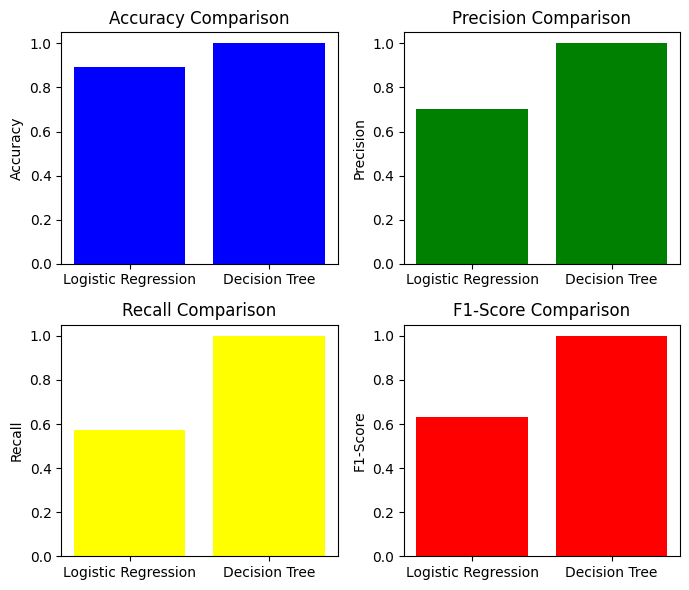

In [97]:
#Comparing the Logistic Classifier and DecisionTree models using bar graphs
models = ['Logistic Regression', 'Decision Tree']
accuracy = [accuracy_score(y_test,y_pred), accuracy_dt]

# Separate precision, recall, and f1_score for each model
precision = [log_reg_precision1, precision_dt1]
recall = [log_reg_recall1, recall_dt1]
f1_score = [log_reg_f1_score1, f1_score_dt1]


# Bar graphs for comparison - separate plots for each metric
plt.figure(figsize=(7, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracy, color='blue')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(2, 2, 2)
plt.bar(models, precision, color='green')
plt.ylabel('Precision')
plt.title('Precision Comparison')

plt.subplot(2, 2, 3)
plt.bar(models, recall, color='yellow')
plt.ylabel('Recall')
plt.title('Recall Comparison')

plt.subplot(2, 2, 4)
plt.bar(models, f1_score, color='red')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')

plt.tight_layout()
plt.show()

In [98]:
#Take a sample input and classify placement getting probabitity using dt model
# IQ
# Prev_Sem_Result
# CGPA
# Academic_Performance
# Internship_Experience
# Extra_Curricular_Score
# Communication_Skills
# Projects_Completed

name = input("Enter your name: ")
iq = int(input("Enter your IQ (on scale of 100-200): "))
prev_sem_result = float(input("Enter your previous semester result (on scale of 0.5-1.0): "))
cgpa = float(input("Enter your CGPA (on scale of 0.5-1.0): "))
academic_performance = int(float(input("Enter your academic performance (on scale 10): ")))
internship_experience = input("Do you have any internship experience? (type Yes-1/No-0): ")
extra_curricular_score = int(input("Enter your extra curricular score: (on scale 10)"))
communication_skills = int(input("Enter your communication skills: (on scale 10)"))
projects_completed = int(input("Enter your projects completed: (0-5)"))

sample = pd.DataFrame({
    'IQ': [iq],
    'Prev_Sem_Result': [prev_sem_result],
    'CGPA': [cgpa],
    'Academic_Performance': [academic_performance],
    'Internship_Experience': [internship_experience],
    'Extra_Curricular_Score': [extra_curricular_score],
    'Communication_Skills': [communication_skills],
    'Projects_Completed': [projects_completed]
})

sample.head()

Enter your name: balaji
Enter your IQ (on scale of 100-200): 122
Enter your previous semester result (on scale of 0.5-1.0): 8.88
Enter your CGPA (on scale of 0.5-1.0): 8.96
Enter your academic performance (on scale 10): 9
Do you have any internship experience? (type Yes-1/No-0): 0
Enter your extra curricular score: (on scale 10)8
Enter your communication skills: (on scale 10)8
Enter your projects completed: (0-5)4


,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed
0,122,8.88,8.96,9,0,8,8,4


In [99]:
sample_result = dt.predict(sample)
sample_result

array([1])

In [104]:
sample_proba = dt.predict_proba(sample)
if  sample_result == 1:
  print(name,"will get place")
  print("Congrats!.. keep on working great")
else:
  print(name,"will not get place")
  print("Need Improvements")

balaji will get place
Congrats!.. keep on working great
